In [1]:
from deepcrypto.backtest import *
from deepcrypto.portfolio_analysis import *
from deepcrypto.data_utils.crawlers.binance_crawler import *
from talib.abstract import *

In [21]:
data = read_binance_data("/home/ych/Storage/binance/binance.db", "1H", "BTCUSDT")
data = data.backtest.add_defaults()

In [14]:
def strategy(df, config):
    mean_volume = df["volume"].rolling(int(config["mean_volume_period"])).mean().shift(1)
    volume_signal = (df["volume"] / mean_volume) > config["volume_times"]
    
    returns = df["close"].pct_change(int(config["return_period"])
    return_signal = ((returns == returns.rolling(int(config["return_signal_period"])).max()).rolling(int(config["any_return_period"])).max() == 1)
        
    breakout_signal = df["high"] > df["high"].rolling(int(config["time_cut"] // 2)).max().shift(1)
    breakout_signal_short = df["low"] < df["low"].rolling(int(config["time_cut"] // 2)).min().shift(1)
    
    ma = df["close"].rolling(int(config["ma_period"])).mean()
    ma_signal = ma.diff() > 0
    
    df["enter_long"] = return_signal & volume_signal & ma_signal & breakout_signal
    # df["enter_short"] = short_return_signal & volume_signal & (ma_signal == 0) & breakout_signal_short
    
    df["bet"] = np.clip(0.05 / df["close"].pct_change().rolling(200).std(), 0.1, 1) * 2
    
    df["time_cut"] = config["time_cut"]
    df["stop_loss"] = config["stop_loss"] / df["bet"]
    df["take_profit"] = config["take_profit"]
    df["trade_cost"] = 0.001
    

    
    return df

SyntaxError: invalid syntax (<ipython-input-14-f743954b2d38>, line 6)

In [4]:
DEFAULT_CONFIG = {
    "mean_volume_period" : 24,
    "ma_period" : 24,
    "volume_times" : 3,
    "return_period" : 6,
    "any_return_period" : 3,
    "return_signal_period" : 24,
    "time_cut" : 24,
    "stop_loss" : 0.05,
    "take_profit" : 0.1
}

In [5]:
order, port = strategy(df, DEFAULT_CONFIG).backtest()

backtest completed in 0.4288618564605713 seconds


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-08-25  2017-08-25
End Period                 2021-05-09  2021-05-09
Risk-Free Rate             0.0%        0.0%
Time in Market             13.0%       100.0%

Cumulative Return          1,404.63%   1,265.91%
CAGR%                      107.91%     102.55%

Sharpe                     0.29        0.21
Sortino                    0.45        0.3
Sortino/√2                 0.32        0.21

Max Drawdown               -30.23%     -83.9%
Longest DD Days            159         1079
Volatility (ann.)          8.35%       15.32%
R^2                        0.03        0.03
Calmar                     3.57        1.22
Skew                       3.21        0.08
Kurtosis                   205.85      30.72

Expected Daily %           0.01%       0.01%
Expected Monthly %         6.07%       5.85%
Expected Yearly %          71.98%      68.69%
Kelly Criterion            7.7

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-10-28,2019-12-19,2020-03-30,154,-30.231118,-29.348539
2,2020-05-15,2020-07-23,2020-10-21,159,-27.421349,-26.609390
3,2019-07-21,2019-09-02,2019-10-26,97,-25.150821,-24.138869
4,2018-12-19,2019-02-03,2019-02-19,61,-21.315376,-20.403994
5,2020-10-22,2020-11-04,2020-11-13,22,-18.753371,-17.725608


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


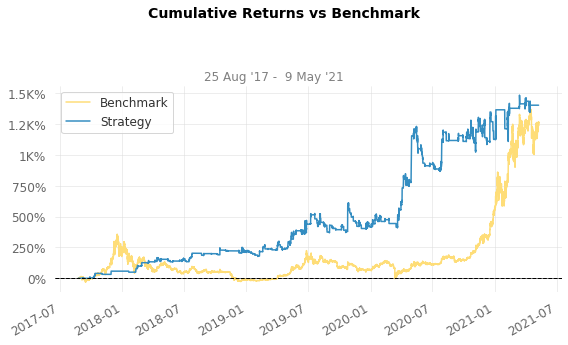

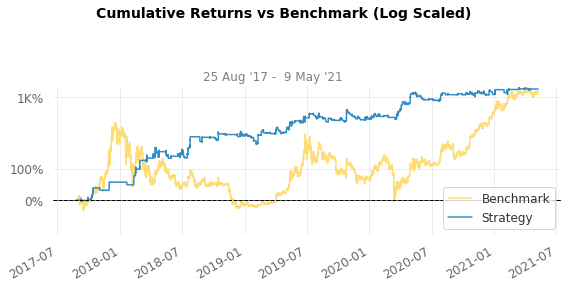

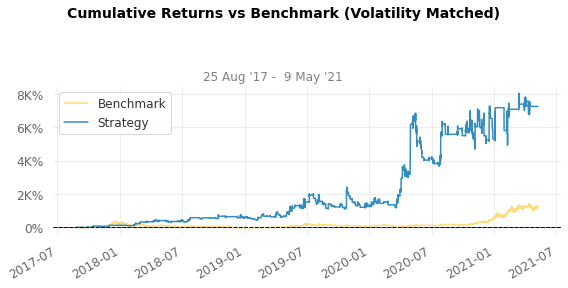

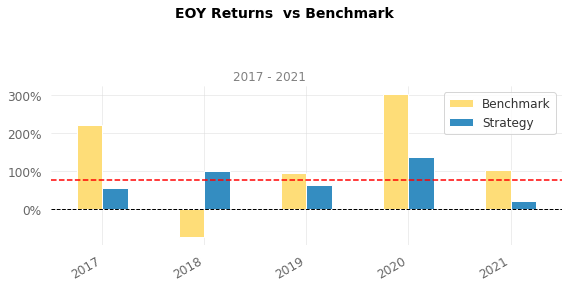

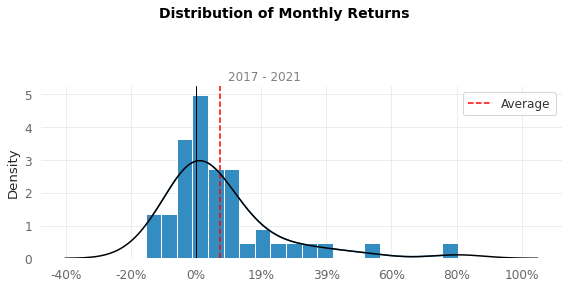

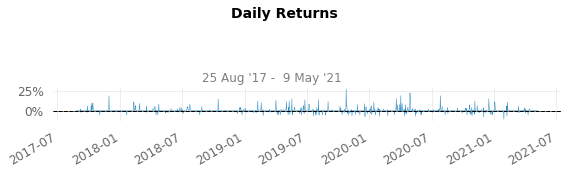

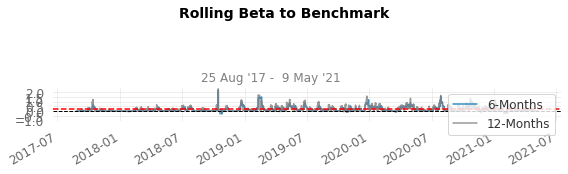

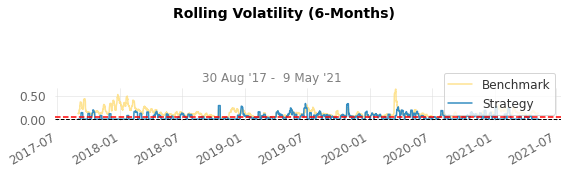

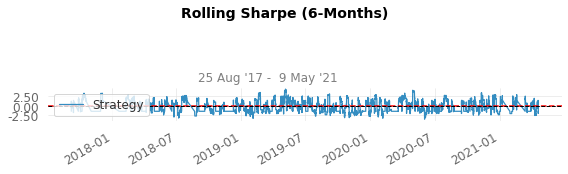

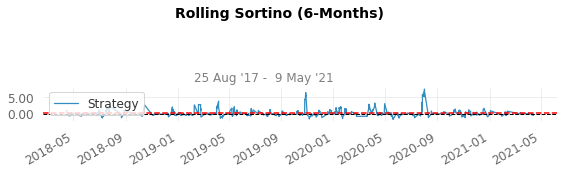

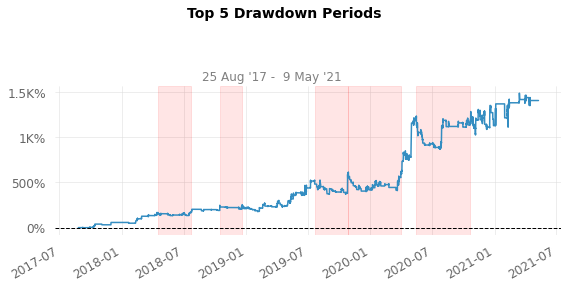

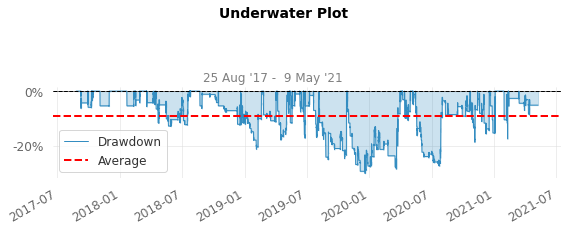

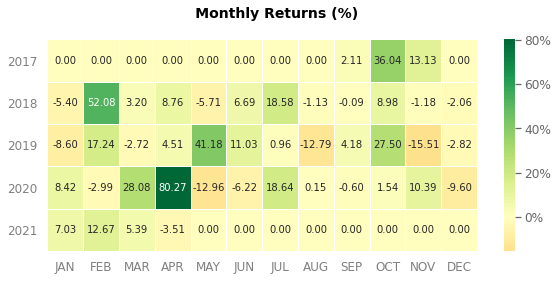

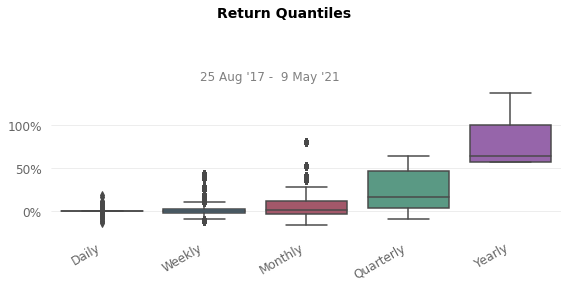

In [6]:
qs.reports.full(port["portfolio_value"], benchmark=port["open"])

In [7]:
all_metrics(port, order)

/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:6: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


{'StartPeriod': '2017-08-25',
 'EndPeriod': '2021-05-09',
 'Risk-FreeRate': 0.0,
 'TimeinMarket': 0.13,
 'CumulativeReturn': 14.05,
 'CAGR%': 1.08,
 'Sharpe': 0.29,
 'Sortino': 0.45,
 'Sortino/√2': 0.32,
 'MaxDrawdown': -0.3,
 'LongestDDDays': 159,
 'Volatility(ann.)': 0.08,
 'Calmar': 3.57,
 'Skew': 3.21,
 'Kurtosis': 205.85,
 'ExpectedDaily%': 0.0,
 'ExpectedMonthly%': 0.06,
 'ExpectedYearly%': 0.72,
 'KellyCriterion': 0.08,
 'RiskofRuin': 0.0,
 'DailyValue-at-Risk': -0.01,
 'ExpectedShortfall(cVaR)': -0.01,
 'Gain/PainRatio': 0.68,
 'Gain/Pain(1M)': 3.55,
 'PayoffRatio': 1.19,
 'ProfitFactor': 1.2,
 'CommonSenseRatio': 1.07,
 'CPCIndex': 0.72,
 'TailRatio': 0.89,
 'OutlierWinRatio': 25.14,
 'OutlierLossRatio': 1.61,
 'MTD': 0.0,
 '3M': 0.15,
 '6M': 0.17,
 'YTD': 0.23,
 '1Y': 0.16,
 '3Y(ann.)': 0.81,
 '5Y(ann.)': 1.08,
 '10Y(ann.)': 1.08,
 'All-time(ann.)': 1.08,
 'BestDay': 0.2,
 'WorstDay': -0.13,
 'BestMonth': 0.8,
 'WorstMonth': -0.16,
 'BestYear': 1.37,
 'WorstYear': 0.23,
 'Avg

In [8]:
{
    "mean_volume_period" : 24,
    "ma_period" : 24,
    "volume_times" : 3,
    "return_period" : 6,
    "any_return_period" : 3,
    "return_signal_period" : 24,
    "time_cut" : 24,
    "stop_loss" : 0.05,
    "take_profit" : 0.1
}

{'mean_volume_period': 24,
 'ma_period': 24,
 'volume_times': 3,
 'return_period': 6,
 'any_return_period': 3,
 'return_signal_period': 24,
 'time_cut': 24,
 'stop_loss': 0.05,
 'take_profit': 0.1}

In [9]:
def optimizer(config, df):
    from deepcrypto.backtest import BacktestAccessor
    order_df, portfolio_df = strategy(df, config).backtest.run()
    tune.report({"sortion" : qs.stats.sortino(portfolio_df["portfolio_value"]), "calmar" : qs.stats.calmar(portpolio_df["portfolio_value"])})

def optimize(df):
    result = tune.run(
        tune.with_parameters(optimizer, df=df),
        config = {
                    "mean_volume_period" : [6, 24, 48],
                    "ma_period" : [24, 120],
                    "volume_times" : [3, 5],
                    "return_period" : [1, 3, 6],
                    "any_return_period" : [3, 5],
                    "return_signal_period" : [6, 24, 48],
                    "time_cut" : [12, 24],
                    "stop_loss" : [0.02, 0.05],
                    "take_profit" : [0.05, 0.1, 0.15]
                },
        local_dir="./ray_results/breakout_strategy",
    )
    
    return result

In [10]:
from ray import tune
import ray

/home/ych/anaconda3/envs/DeepCrypto/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [11]:
ray.init()

2021-05-14 03:53:29,762	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8266


{'node_ip_address': '192.168.68.106',
 'raylet_ip_address': '192.168.68.106',
 'redis_address': '192.168.68.106:44343',
 'object_store_address': '/tmp/ray/session_2021-05-14_03-53-27_306772_51590/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-14_03-53-27_306772_51590/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-05-14_03-53-27_306772_51590',
 'metrics_export_port': 60062,
 'node_id': '784f31b6f6362adf35d2b06010759ac95793a3e060a60c3cdfe29ecc'}